# A DataFramed code along special: the favorite techniques of the experts

We have recently launched a [new data science podcast called DataFramed](https://www.datacamp.com/community/podcast), in which I speak with experts and thought leaders from academia and industry about what data science looks like in practice and how it's changing society. I often ask my guests what one of their data sciencey techniques is. Today, I'll take you through a bunch of them!

<p align="center">
<img src="img/DataFramed 1400x1400.png" width="300">
</p>


We'll look at 

* Scatter plots
* Decision trees
* Linear regression
* Using log axes
* Logistic regression
* PCA

You can subscribe to DataFramed [on iTunes here](https://itunes.apple.com/us/podcast/dataframed/id1336150688) and on [the Google play store here](https://play.google.com/music/listen?u=0#/ps/Idltnsiq2bvzpfzn5tni3iixyta).

### Give-away

We're also having a give-away for those who write iTunes reviews for us! 5 lucky randomly selected reviewers will receive DataCamp swag: we've got sweatshirts, pens, stickers, you name it aaaaaaand one of those 5 will be selected to interview me in one of our podcast segments!

**What do you need to do?**

* Write a review of DataFramed (a positive one!) in [the iTunes store].(https://itunes.apple.com/us/podcast/dataframed/id1336150688)
* email dataframed@datacamp.com a screenshot of the review and the country in whose store you posted it (note: this email address is not regularly checked except for this give-away).
* Do these things by EOD Friday March 2nd in your time zone.


If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/DataCamp).

# 1 Scatter plots

Roger Peng appeared on [this week's episode of DataFramed](https://www.datacamp.com/community/podcast/data-science-environment-moocs). Roger is a Professor in the Department of Biostatistics at the Johns Hopkins Bloomberg School of Public Health, co-director of the Johns Hopkins Data Science Lab and co-founder of the Johns Hopkins Data Science Specialization. Roger is also a well-seasoned podcaster on Not so Standard deviations and the Effort Report. In this episode, we talked about data science, it's role in researching the environment and air pollution, massive open online courses for democratizing data science and much more.

In Roger's words,

> ** Frankly, my favorite tool is just simply a scatter plot. I think plotting is so revealing. It's not something that, frankly, I see a lot done. I think the reason why, I thought about why this is the case, and I think the reason is because it's one of those tools that really instills trust in the people who receive the plot. Because they feel like they can see the data, they feel like they can understand if you have a model that's overlaid they know how the data goes into the model. They can reason about the data and I think it's one of the really critical things for building trust.**



So let's now build some scatter plots to see their power. First you'll import some required packages, import your data and check it out.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Import data and check out several rows
df = pd.read_csv('data/bc.csv')

* What are the column names, types and how many entries are there?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

* Check out summary statistics of the columns:

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Question:** what is the data? Check it out <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">here</a>.

**Question:** Why are we interested in this data?
    
**One answer:** To predict diagnosis (benign or malignant).

**Recap:**

* We've imported the UCI breast cancer dataset and explored it (but not visually).
* Next up: we'll see the power of scatter plots and why Roger Peng loves them so much.

### Give-away

We're also having a give-away for those who write iTunes reviews for us! 5 lucky randomly selected reviewers will receive DataCamp swag: we've got sweatshirts, pens, stickers, you name it aaaaaaand one of those 5 will be selected to interview me in one of our podcast segments!

**What do you need to do?**

* Write a review of DataFramed (a positive one!) in [the iTunes store](https://itunes.apple.com/us/podcast/dataframed/id1336150688).
* email dataframed@datacamp.com a screenshot of the review and the country in whose store you posted it (note: this email address is not regularly checked except for this give-away).
* Do these things by EOD Friday March 2nd in your time zone.


If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/DataCamp).

* Now it's time to build some plots!

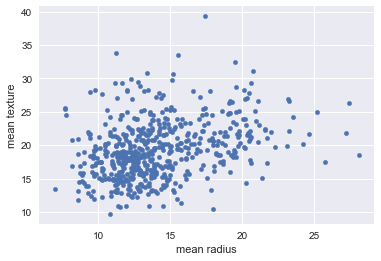

In [5]:
# Scatter plot of 1st two features
df.plot.scatter('mean radius', 'mean texture');

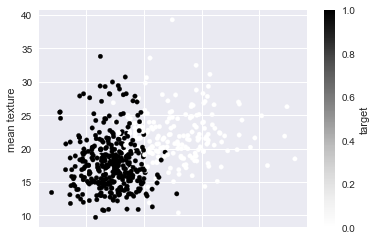

In [6]:
# Scatter plot colored by 'target'
df.plot.scatter('mean radius', 'mean texture', c='target');

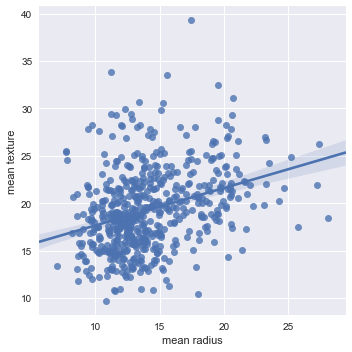

In [7]:
# Scatter plot with linear regression
sns.lmplot('mean radius', 'mean texture', data=df);

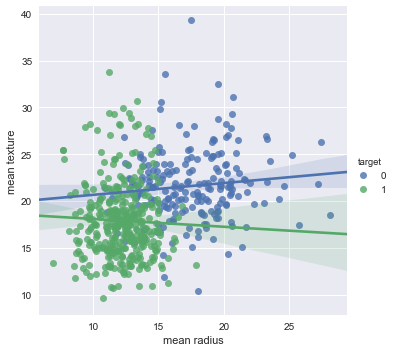

In [8]:
# Scatter plot colored by 'target' with linear regression
sns.lmplot('mean radius', 'mean texture', data=df, hue='target');

* Let's now check out some other features that we think may be related, such as 'mean radius' and 'mean perimeter'.

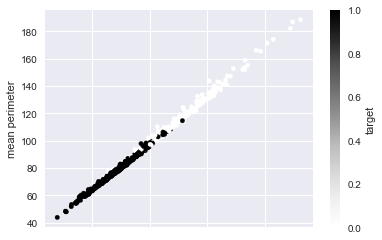

In [20]:
df.plot.scatter(x='mean radius', y='mean perimeter', c='target');

* Check out 'mean radius' vs 'mean area':

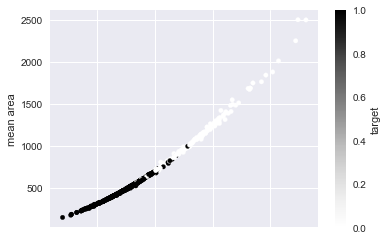

In [21]:
df.plot.scatter('mean radius', 'mean area', c='target');

* You're now going to build a pairplot of this dataset (this will contain all possible scatter plots of features, with histograms along the diagonal). But first you'll subset the data to return the first four and the final column.

In [22]:
# Subset your data
df_sub = df.iloc[:,[0,1,2,3,-1]]

* Now it is time to build you pairplot, using `seaborn`!

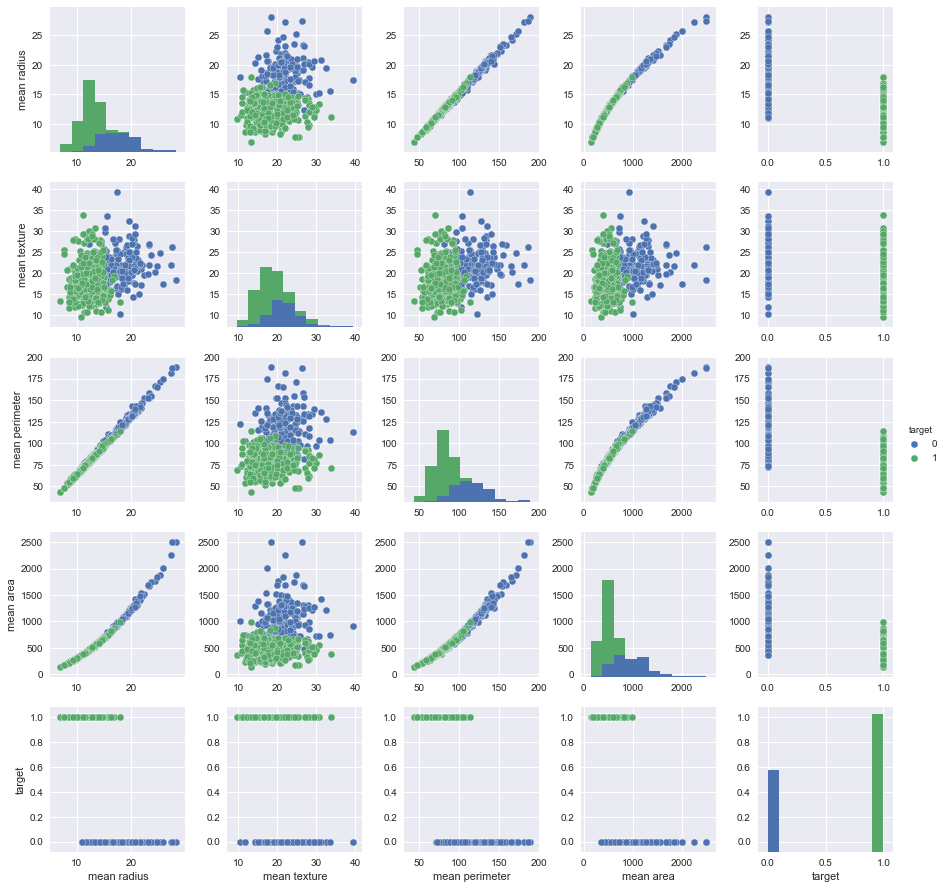

In [24]:
sns.pairplot(df_sub, hue='target');

**Recap:**

* We've imported the UCI breast cancer dataset and explored it (but not visually).
* We have seen the power of scatter plots and why Roger Peng loves them so much.
* Next up: the machine learning superpower of decision trees.

### Give-away

We're also having a give-away for those who write iTunes reviews for us! 5 lucky randomly selected reviewers will receive DataCamp swag: we've got sweatshirts, pens, stickers, you name it aaaaaaand one of those 5 will be selected to interview me in one of our podcast segments!

**What do you need to do?**

* Write a review of DataFramed (a positive one!) in [the iTunes store](https://itunes.apple.com/us/podcast/dataframed/id1336150688).
* email dataframed@datacamp.com a screenshot of the review and the country in whose store you posted it (note: this email address is not regularly checked except for this give-away).
* Do these things by EOD Friday March 2nd in your time zone.


If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/DataCamp).

# 2 Decision trees for prediction

In [episode 2 of DataFramed](https://www.datacamp.com/community/podcast/data-science-telecommunications), I spoke with Chris Volinksy, Assistant Vice President for Big Data Research at AT&T Labs, and all around top bloke.

Chris Volinsky:
> **I'm always amazed at the power of some of the old school techniques. Good old fashioned linear regression is still a really powerful and interpretable, and tried and true technique. It's not always appropriate, but often works well. Decision trees are another old school technique, I'm always amazed at how well they work. But, you know, one thing I always find really powerful are well done, well-thought out data visualizations. And, you know, I'm a big fan of the type of data visualization that I see in media companies.**

You've already done some datavis, you'll soon do some linear regression. So now you're going to build a decision tree (classifier).

So: what is a decision tree classifier? It is a tree that allows you to classify data points (aka predict target variables, e.g. benign or malignant tumor) based on feature variables (such as geometric measurements of tumors). For example,

<p align="center">
<img src="img/bc.png" width="400">
</p>

**Why do our podcast guests like these?** Because they are interpretable! Another way of saying this is

> An interpretable model is one whose predictions you can explain. 

-- Mike Lee Williams, Research Engineer, Cloudera Fast Forward Labs (check out [this segment](https://soundcloud.com/dataframed/9-data-science-and-online-experiments-at-etsy#t=17:10))

* You first **fit** such a model to your training data, which means deciding (based on the training data) which decisions will split at each branching point in the tree. E.g. that the first branch is on the feature 'mean area' and that 'mean area' less than 696.25 results in a prediction of 'benign'. 

**Note** that it's actually the Gini coefficient which is used to make these decisions. At this point, you won't delve deeper into these stuff.

So let's now build a decision tree classifier. First up, create `numpy` arrays `X` and `y` that contain your features and your target, respectively.

In [31]:
X=df_sub.drop('target',axis=1).values
y=df_sub.target.values

* You'll want to fit (or train) your model on a subset of the data, called the _training set_. * You'll then test it on the another set, the _test set_. Testing it means predicting and seeing how good the predictions are. 
* You'll use a metric called _accuracy_, which is the fraction of correct predictions. 
* **Now** split your data in training/test sets using `scikit-learn`.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y)

* Now you get to build your decision tree classifier. First create such a model with `max_depth=2` and then fit it your data:

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

* Compute the accuracy on the test set:

In [34]:
clf.score(X_test,y_test)

0.89473684210526316

* For fun, compute the score on the training set:

In [35]:
clf.score(X_train,y_train)

0.90109890109890112

* Visualize your decision tree using `graphviz`:

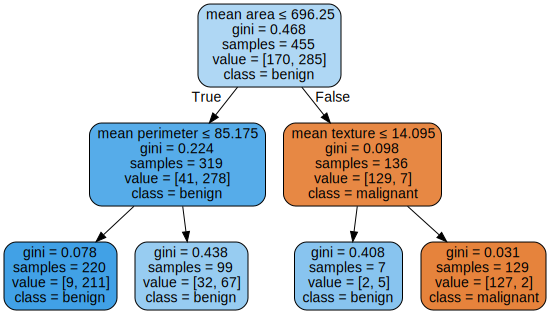

In [36]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=df_sub.drop('target', axis=1).columns,  
                         class_names=['malignant', 'benign'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

**Recap:**

* We've imported the UCI breast cancer dataset and explored it (but not visually).
* We have seen the power of scatter plots and why Roger Peng loves them so much.
* We've used the machine learning superpower of decision trees.
* Next up: linear regression and interpretability.

### Give-away

We're also having a give-away for those who write iTunes reviews for us! 5 lucky randomly selected reviewers will receive DataCamp swag: we've got sweatshirts, pens, stickers, you name it aaaaaaand one of those 5 will be selected to interview me in one of our podcast segments!

**What do you need to do?**

* Write a review of DataFramed (a positive one!) in [the iTunes store](https://itunes.apple.com/us/podcast/dataframed/id1336150688).
* email dataframed@datacamp.com a screenshot of the review and the country in whose store you posted it (note: this email address is not regularly checked except for this give-away).
* Do these things by EOD Friday March 2nd in your time zone.


If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/DataCamp).

# 3 Linear regression

We already saw that Chris Volinsky was a huge fan of linear regression:
> **But, I'm always amazed at the power of some of the old school techniques. Good old fashioned linear regression is still a really powerful and interpretable, and tried and true technique.**

The above tumor prediction task was a _classification task_, you were trying to classify _tumors_. 

The other well-known prediction task is called a _regression task_, in which you're trying to predict a numeric quantity, such as the life expectancy in a given nation. 

Let's import some [Gapminder](https://www.gapminder.org/) data to do so:

In [16]:
# Import data and check out first rows
df_gm = pd.read_csv('data/gm_2008_region.csv')

* What are the column names, types and how many entries are there?

In [17]:
df_gm.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


You're going to use a linear regression model to try to predict the life expectancy in a given country, based on its fertility rate. But first, make a scatter plot ;)

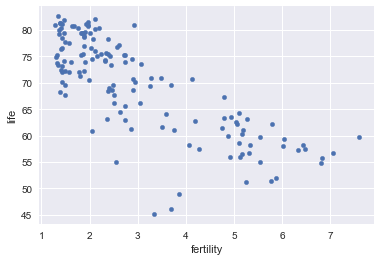

In [25]:
df_gm.plot.scatter(x='fertility',y='life');
plt.show()

A linear model fits a straight **line** to the data:

$$y = a_0 + a_1x.$$

This is once again an interpretable model as it tells us

* a 1-unit increase in $x$ leads to an $a_1$ increase in $y$.

Lets now see this in action. You'll fit the model to the entire data set and visualize the regression (fitting the model determines the parameters $a_i$ in the above equation):

In [29]:
# Subset data into feature and target
y = df_gm.life.values
X_fertility = df_gm.fertility.values

In [30]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_fertility,y)

# Plot scatter plot of data
plt.scatter(X_fertility,y)

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3);

# Print R^2 
print(reg.score(X_fertility, y))

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.73  6.43  2.24  1.4   1.96  1.41  1.99  1.89  2.38  1.83  1.42  1.82
  2.91  5.27  2.51  3.48  2.86  1.9   1.43  6.04  6.48  3.05  5.17  1.68
  6.81  1.89  2.43  5.05  5.1   1.91  4.91  1.43  1.5   1.89  3.76  2.73
  2.95  2.32  5.31  5.16  1.62  2.74  1.85  1.97  4.28  5.8   1.79  1.37
  4.19  1.46  4.12  5.34  5.25  2.74  3.5   3.27  1.33  2.12  2.64  2.48
  1.88  2.    2.92  1.39  2.39  1.34  2.51  4.76  1.5   1.57  3.34  5.19
  1.42  1.63  4.79  5.78  2.05  2.38  6.82  1.38  4.94  1.58  2.35  1.49
  2.37  2.44  5.54  2.05  2.9   1.77  2.12  2.72  7.59  6.02  1.96  2.89
  3.58  2.61  4.07  3.06  2.58  3.26  1.33  1.36  2.2   1.34  1.49  5.06
  5.11  1.41  5.13  1.28  1.31  1.43  7.06  2.54  1.42  2.32  4.79  2.41
  3.7   1.92  1.47  3.7   5.54  1.48  4.88  1.8   2.04  2.15  6.34  1.38
  1.87  2.07  2.11  2.46  1.86  5.88  3.85].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

* **Question:** Looking at the above figure, what would you expect the regression coefficient of interest to be? Now you're going to print the regression coefficient from the model:

In [ ]:
# Print regression coefficient(s)


* **Note:** You'll genereally want to normalize your data before using regression models and you may want to used a penalized regression such as lasso or ridge regression. See our [Supervised Learning with scikit-learn course](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn) for more on these techniques.

* You'll now do the same using a two parameter model ('fertility', 'GDP'):

$$y = a_0 + a_1x_1 + a_2x_2.$$

In [ ]:
# Extract features from `df_gm`:


In [ ]:
# Create the regressor: reg


# Fit the model to the data


# Print R^2 
print(reg.score(X, y))

In [ ]:
# Print regression coefficient(s)


* **Interpret** the above regression coefficients.

But hold up. We didn't plot 'GDP'. What does it look like against 'life'. Plot it now to find out:

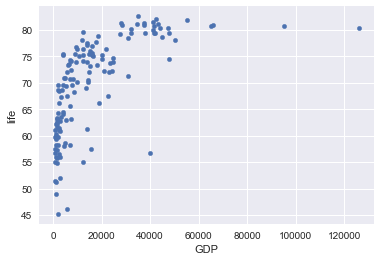

In [34]:
df_gm.plot.scatter(x='GDP',y='life')
plt.show()

**Notice:** GDP is pretty bunched up between 0 and 40K but there are also values > 100,000. Are there plotting techniques to deal with this?

# 5 Plotting with log axes

In [episode 6 of DataFramed](https://www.datacamp.com/community/podcast/citizen-data-science), I interviewed David Robinson, Chief Data Scientist at DataCamp, about _Citizen Data Science_. Dave's favorite technique is using log axes.

> **So this is a simple technique, but it's one that I think is really underrated and is really kind of one of my favorites. It's learn to put something on a log scale. That is, take it from numbers that go one, two, three, four, five, six and if you can just instead have a scale that goes 1, 10, 100, 1,000. So that's really important when grafting because so many sets of numbers that we work with in the real world exist on scales that are much larger. That are these multiple different orders of magnitude.**

* Plot 'life' vs 'GDP' with a log axis for 'GDP':

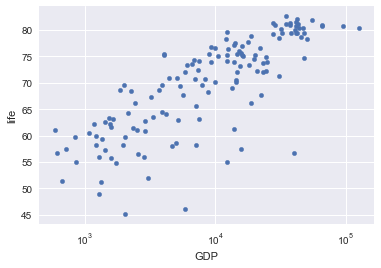

In [35]:
df_gm.plot.scatter(x='GDP',y='life')
plt.xscale('log')
plt.show()

**Recap:**

* We've imported the UCI breast cancer dataset and explored it (but not visually).
* We have seen the power of scatter plots and why Roger Peng loves them so much.
* We've used the machine learning superpower of decision trees.
* We've used linear regression and and explored its interpretability.
* We've used log axes to make our plots easier to read.
* Next up: logistic regression for classification challenges.

### Give-away

We're also having a give-away for those who write iTunes reviews for us! 5 lucky randomly selected reviewers will receive DataCamp swag: we've got sweatshirts, pens, stickers, you name it aaaaaaand one of those 5 will be selected to interview me in one of our podcast segments!

**What do you need to do?**

* Write a review of DataFramed (a positive one!) in [the iTunes store](https://itunes.apple.com/us/podcast/dataframed/id1336150688).
* email dataframed@datacamp.com a screenshot of the review and the country in whose store you posted it (note: this email address is not regularly checked except for this give-away).
* Do these things by EOD Friday March 2nd in your time zone.


If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/DataCamp).

# 4 Logistic regression

In [episode 3 of DataFramed](https://www.datacamp.com/community/podcast/data-science-machine-learning-online-advertising), I interviewed Claudia Perlich, Chief Scientist at Dstillery, where she led the machine learning efforts that help target consumers and derive insights for marketers. We spoke about the role of data science in the online advertising world, the predictability of humans, how Claudia's team built real time bidding algorithms and detected bots online, along with the ethical implications of all of these evolving concepts.

> **Today I really value the simplicity and elegance and also transparency that you can get from linear models like logistic regression ... because it's so much easier to look under the hood and understand what might be going on there. It really has become my go to tool over the last I would say 10, 15 years. In fact, I won all of my data mining competitions using some form of a logistic model.**


* Now let's clarify something: logistic regression is a linear classification algorithm. In this section, you'll use a logistic regression model to build classification predictions for the breast cancer dataset.

**How does logistic regression work?**

Logistic regression essentially takes a linear combination of the features 

$$t = a_0 + a_1x_1 + a_2x_2 + \ldots + a_nx_n.$$

Then transforms $t$ into

$$p = \frac{1}{1+e^{-t}}.$$

* Lets now visualize this transformation $t \to p$:

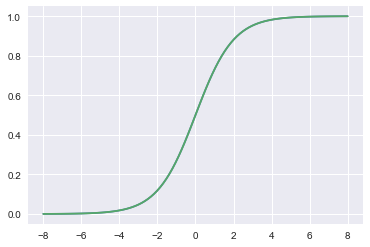

In [37]:
t = np.linspace(-8,8,100)
p = 1/(1+np.exp(-t))
plt.plot(t,p);

**Interpretation:** $p$ is the estimated probability that, for example, the tumor is malignant.

**Note:** fitting the model to the data determines the coefficients $a_i$.

If $p>0.5$, we classify the target as 1 (malignant), otherwise as 0 (benign).

### How is this model interpretable

Well, rearranging the above equations yield

$$a_0 + a_1x_1 + a_2x_2 + \ldots + a_nx_n = t = \text{log}(\frac{p}{1-p})=\text{logit}(p)$$

And $\frac{p}{1-p}$ is called the odds ratio: this is the probability of the tumor being malignant over the probability of the tumor being benign.

So: increasing $x_1$ by 1 unit will increase the odds ratio $\frac{p}{1-p}$ by $\text{exp}(a_1)$ units. It is in this way that logistic regression is interpretable. It's now time to see this in action.

In [39]:
# Check out 1st several rows of data for reacquaintance purposes
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Split into features/target


In [40]:
#Build logistic regression model, fit to training set
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
# Compute accuracy on test set
logistic.score(X_test,y_test)

0.95614035087719296

* Print coefficients of logreg model:

In [42]:
logistic.coef_

array([[  1.93267409e+00,   6.55555634e-02,  -5.16834609e-02,
         -1.48115433e-03,  -1.45893308e-01,  -3.80669782e-01,
         -5.94488637e-01,  -3.04710337e-01,  -2.67691522e-01,
         -2.88501242e-02,  -1.41436490e-02,   1.10657777e+00,
         -1.40249909e-02,  -8.51696750e-02,  -1.58681537e-02,
         -5.13578684e-03,  -4.87620861e-02,  -3.83710095e-02,
         -4.80233609e-02,   5.57322454e-03,   1.15174481e+00,
         -2.94281278e-01,  -9.79189444e-02,  -2.55721203e-02,
         -2.65902356e-01,  -1.17480211e+00,  -1.57738176e+00,
         -6.19841976e-01,  -7.57406712e-01,  -1.14865580e-01]])

from [this here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/):

* a 1-unit increase in 'mean texture' will result in logit(p) decreasing by 0.16. Thus the odds ratio decreases by exp(0.16) = 1.17 or changes by a factor of 0.85.

In [43]:
print(np.exp(0.16))
print(1/np.exp(0.16))

1.17351087099
0.852143788966


**Recap:**

* We've imported the UCI breast cancer dataset and explored it (but not visually).
* We have seen the power of scatter plots and why Roger Peng loves them so much.
* We've used the machine learning superpower of decision trees.
* We've used linear regression and and explored its interpretability.
* We've used log axes to make our plots easier to read.
* We've seen the power of logistic regression.
* Next up: PCA as the swiss army knife of machine learning.

### Give-away

We're also having a give-away for those who write iTunes reviews for us! 5 lucky randomly selected reviewers will receive DataCamp swag: we've got sweatshirts, pens, stickers, you name it aaaaaaand one of those 5 will be selected to interview me in one of our podcast segments!

**What do you need to do?**

* Write a review of DataFramed (a positive one!) in [the iTunes store](https://itunes.apple.com/us/podcast/dataframed/id1336150688).
* email dataframed@datacamp.com a screenshot of the review and the country in whose store you posted it (note: this email address is not regularly checked except for this give-away).
* Do these things by EOD Friday March 2nd in your time zone.


If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/DataCamp).

# 5 Principal Component Analysis

In [episode 8 of DataFramed](https://www.datacamp.com/community/podcast/data-science-astronomy), I chatted with Jake VanderPlas, a data science fellow at the University of Washington's eScience Institute, where his work focuses on data-intensive physical science research in an interdisciplinary setting. In the Python world, Jake is the author of the Python Data Science Handbook, and is active in maintaining and/or contributing to several well-known Python scientific computing packages, including Scikit-learn, Scipy, Matplotlib, Astropy, Altair, and others.

> My all-time favorite in machine learning is **principal component analysis**. I just think it’s like a Swiss army knife, you can do anything with it...When I was a grad student I quickly found that whenever I was going to my meeting with my thesis advisor and I had new data set or something to look at, the first question that he was going to ask me was, "Well, did you do PCA? "

Principal component analysis is an example of dimensionality reduction and a favorite way to do it for many working data scientists. It's important as many datasets have way too many features to put into a scalable machine learning pipeline (for example) and it helps you to reduce the dimensionality of your data while retaining as much information as possible. Note: in essence, it's a form of compression.

* Plot 'mean radius' against 'mean perimeter':

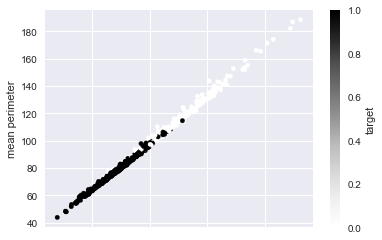

In [44]:
df.plot.scatter(x='mean radius', y='mean perimeter', c='target');

**Question:** why would you want to compress this data, that is, reduce to a lower-dimensional space?

The idea is the following: if features are correlated as they are above, we may have enough information if we throw one of them away.

* The first step of PCA is to decorrelate your data and this corresponds to a linear transformation of the vector space your data lie in;
* The second step is the actual dimension reduction; what is really happening is that your decorrelation step (the first step above) transforms the features into new and uncorrelated features; this second step then chooses the features that contain most of the information about the data (we'll formalize this soon enough).

Visualize the PCA transformation that preserves number of features.

In [ ]:
# Split original breast cancer data into features/target
X = df.drop('target', axis=1).values
y = df['target'].values

In [ ]:
# Scale features 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ar_tot = ss.fit_transform(df)

# Apply PCA
from sklearn.decomposition import PCA
model_tot = ____
transformed = ____
print(transformed.shape)
plt.scatter(transformed[:,0], transformed[:,1], c=y);

* Plot explained total variance of principal components against number of components:

* How much variance is contained in the 1st principal component?

* Now you're going to have some real fun by doing PCA before a logistic regression and seeing how many components you need to use to get the best model performance:

In [ ]:
# Split original breast cancer data into features/target
X = df.drop('target', axis=1).values
y = df['target'].values

In [ ]:
# Split data into test/train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
# Build a pipeline of PCA w/ 20 components and a logistic regression
# NOTE: You should also scale your data; this will be an exercise for those
# eager ones out there
from sklearn.pipeline import Pipeline
pca = ____
pipe = ____
____
____

* Now you're going to build a PCA/logreg pipeline for 1 component, 2 components and so on up to 30 components. You'll then plot accuracy as a function of the number of components used.

**Recap:**

* We've imported the UCI breast cancer dataset and explored it (but not visually).
* We have seen the power of scatter plots and why Roger Peng loves them so much.
* We've used the machine learning superpower of decision trees.
* We've used linear regression and and explored its interpretability.
* We've used log axes to make our plots easier to read.
* We've seen the power of logistic regression.
* We've checked out PCA, the swiss army knife of machine learning.

### Give-away

We're also having a give-away for those who write iTunes reviews for us! 5 lucky randomly selected reviewers will receive DataCamp swag: we've got sweatshirts, pens, stickers, you name it aaaaaaand one of those 5 will be selected to interview me in one of our podcast segments!

**What do you need to do?**

* Write a review of DataFramed (a positive one!) in [the iTunes store](https://itunes.apple.com/us/podcast/dataframed/id1336150688).
* email dataframed@datacamp.com a screenshot of the review and the country in whose store you posted it (note: this email address is not regularly checked except for this give-away).
* Do these things by EOD Friday March 2nd in your time zone.


If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/DataCamp).